British Airways Customer Booking Completion Classification

Background Information

Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.


Data Dictionary

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


In [234]:
# import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [235]:
# set up dataframe variable 

df = pd.read_csv("C:\Portfolio\Data Engineer Track\Airline Datasets and Courses\British Airways_ The Forage Course\Task 2\customer_booking.csv")

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [236]:
# drop unnecessary columns

df = df.drop(["sales_channel", "trip_type", "route","booking_origin"], axis = 1)

In [237]:
# map numerical values to flight_day column

mapping = {
    "Sun": 1,
    "Mon": 2,
    "Tue": 3,
    "Wed": 4,
    "Thu": 5,
    "Fri": 6,
    "Sat": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [238]:
# Unique values in flight_day column

df["flight_day"].unique()

array([7, 4, 5, 2, 1, 3, 6], dtype=int64)

In [239]:
# dataframe structure 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  int64  
 5   wants_extra_baggage    50000 non-null  int64  
 6   wants_preferred_seat   50000 non-null  int64  
 7   wants_in_flight_meals  50000 non-null  int64  
 8   flight_duration        50000 non-null  float64
 9   booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 3.8 MB


In [240]:
# first five columns of dataframe

df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,7,1,0,0,5.52,0
1,1,112,20,3,7,0,0,0,5.52,0
2,2,243,22,17,4,1,1,0,5.52,0
3,1,96,31,4,7,0,0,1,5.52,0
4,2,68,22,15,4,1,0,1,5.52,0


In [241]:
# Dataframe rows and columns

df.shape

(50000, 10)

In [242]:
# Summary statistics

df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.896860,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.925174,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,6.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [243]:
# Make the last column an integer from float

df["flight_duration"] = df["flight_duration"].astype(int)

display(df.dtypes)

num_passengers           int64
purchase_lead            int64
length_of_stay           int64
flight_hour              int64
flight_day               int64
wants_extra_baggage      int64
wants_preferred_seat     int64
wants_in_flight_meals    int64
flight_duration          int32
booking_complete         int64
dtype: object

In [244]:
# Count values in booking_complete column

df["booking_complete"].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [245]:
# Correlation table 

df.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,-0.013493,0.120404,0.028544,0.022943,-0.052298,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,-0.093792,-0.022207,-0.004499,-0.022653,0.073636,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,0.007551,0.176757,0.032264,0.098828,0.121764,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,-0.033583,-0.011434,0.012171,0.013014,0.003212,0.007127
flight_day,-0.013493,-0.093792,0.007551,-0.033583,1.000000,0.007635,-0.003446,0.006295,-0.013080,0.003620
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,0.007635,1.000000,0.207669,0.216470,0.048787,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,-0.003446,0.207669,1.000000,0.315088,0.102806,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.006295,0.216470,0.315088,1.000000,0.149657,0.026511
flight_duration,-0.052298,0.073636,0.121764,0.003212,-0.013080,0.048787,0.102806,0.149657,1.000000,-0.101063
booking_complete,0.024116,-0.022131,-0.042408,0.007127,0.003620,0.068139,0.050116,0.026511,-0.101063,1.000000


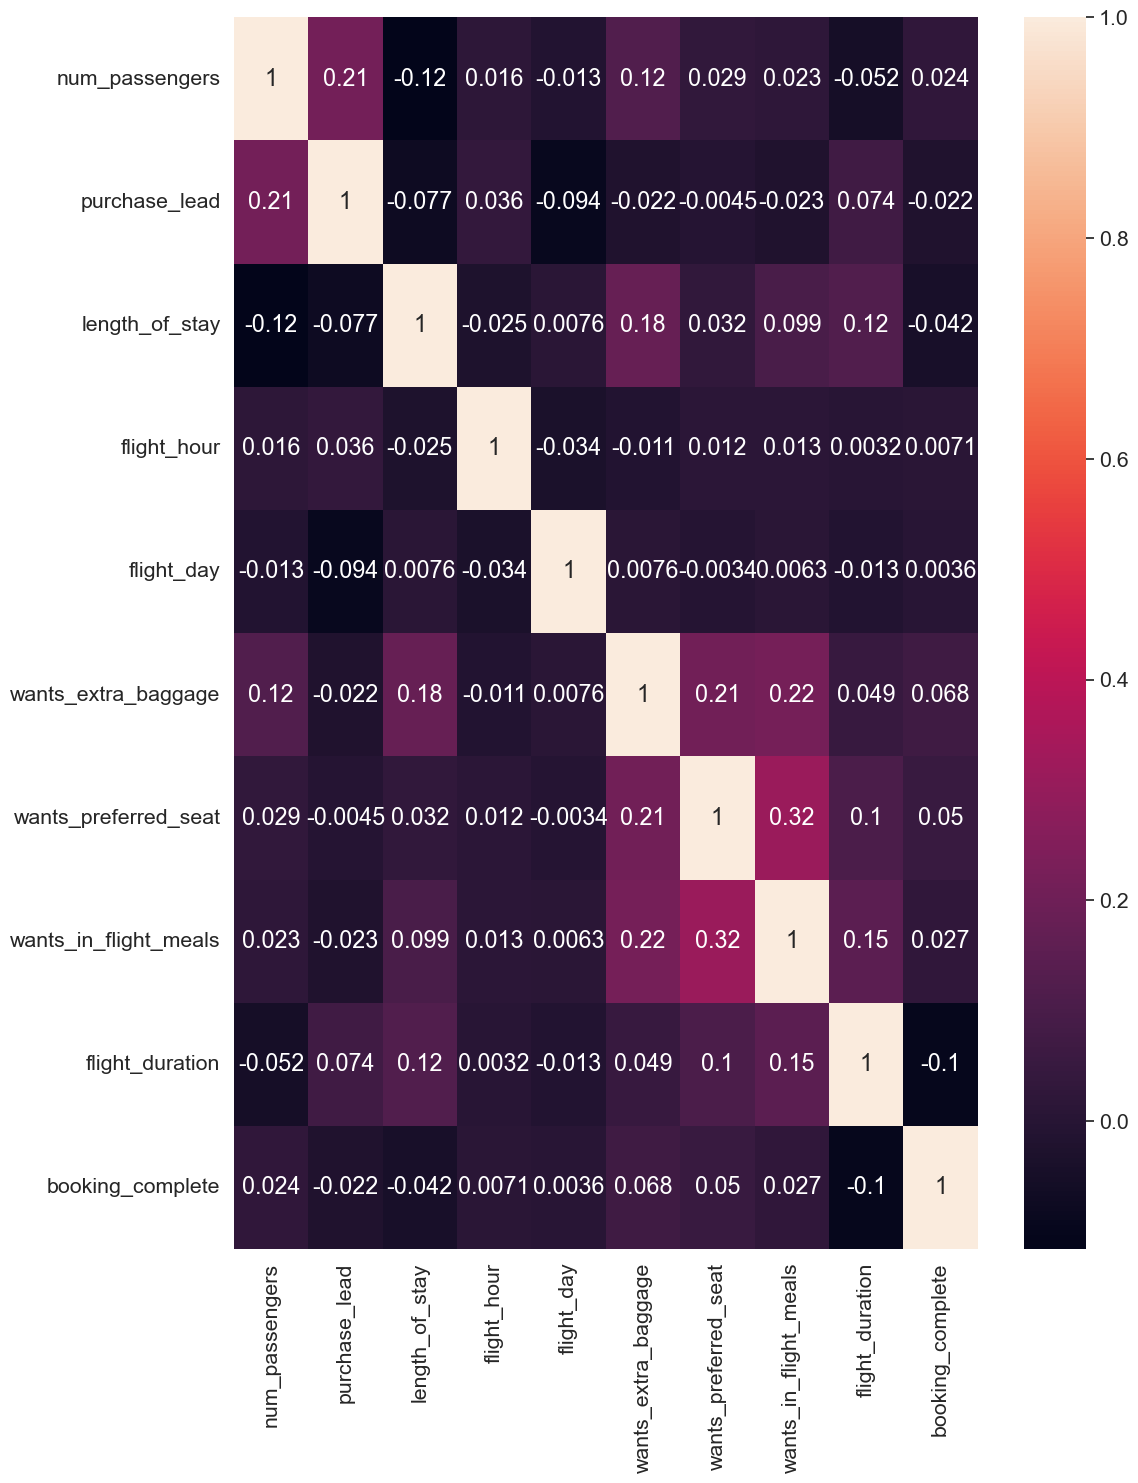

In [246]:
# Plotting the correlation heatmap for the selected variables.
plt.figure(figsize=(12, 16))
ax = sns.heatmap(df.corr(), annot = True)

In [247]:
# Let's check for nulls. 

df.isnull().sum()

num_passengers           0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [248]:
# Import packages for classification models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Import packages for classification models
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
%matplotlib inline

In [249]:
# Establish X and y variables. Everyone does price predictions on housing or property data. 

X = df.drop(["booking_complete"], axis=1)
y = df["booking_complete"]

In [250]:
# Let's see if we can't predict the "booking complete" variable

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=123)
print(X)
X_train.dtypes

       num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0                   2            262              19            7           7   
1                   1            112              20            3           7   
2                   2            243              22           17           4   
3                   1             96              31            4           7   
4                   2             68              22           15           4   
...               ...            ...             ...          ...         ...   
49995               2             27               6            9           7   
49996               1            111               6            4           1   
49997               1             24               6           22           7   
49998               1             15               6           11           2   
49999               1             19               6           10           5   

       wants_extra_baggage 

num_passengers           int64
purchase_lead            int64
length_of_stay           int64
flight_hour              int64
flight_day               int64
wants_extra_baggage      int64
wants_preferred_seat     int64
wants_in_flight_meals    int64
flight_duration          int32
dtype: object

In [265]:
# instantiate the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators = 400, random_state= 123, max_depth = None, max_features = "auto",n_jobs = -1, max_samples = 10000)



# fit the model to the training set

clf.fit(X_train, y_train)

# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score  : 0.8505


In [266]:
# View the feature scores.

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

purchase_lead            0.306552
flight_hour              0.199712
length_of_stay           0.171979
flight_day               0.122072
flight_duration          0.071582
num_passengers           0.065123
wants_in_flight_meals    0.027574
wants_preferred_seat     0.019784
wants_extra_baggage      0.015622
dtype: float64

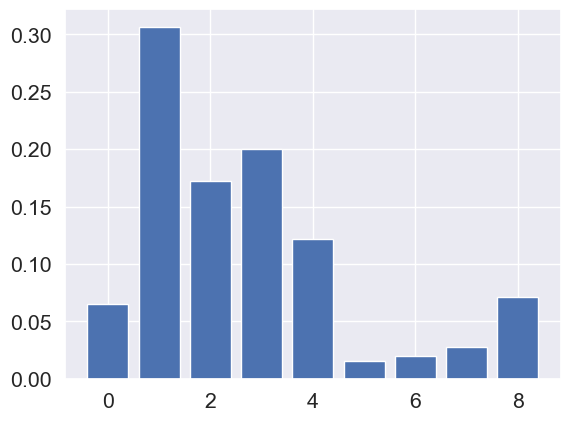

In [272]:
# plot

plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

In [273]:
# View the classification report for test data and predictions

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8505
           1       0.50      0.01      0.02      1495

    accuracy                           0.85     10000
   macro avg       0.68      0.50      0.47     10000
weighted avg       0.80      0.85      0.78     10000



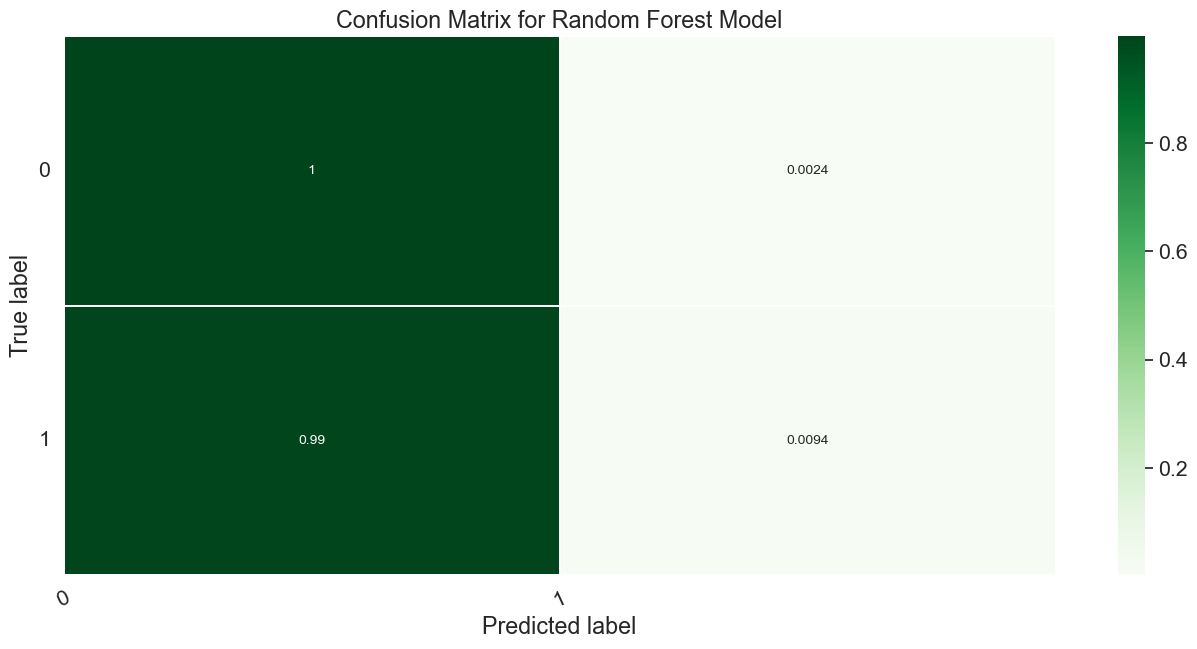

In [256]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()